NOTE: before running all the cells in this notebook, a few Python package installations in the Anaconda command prompt are required:

pip install plotly

pip install cufflinks

pip install gender-detector

For this project, analysis on the data of a movie rental online service will be performed. The data was extracted from a database for training in SQL, which was openly available. In order to obtain the dataset, a series of queries and join commands in PostgreSQL were perfomed. The resulting dataset contains the following fields:

- Rental date: the date that the customer rented the movie (timestamp variable);
- Film title: the title of the movie rented (string variable);
- Genre: the genre of the movie (string variable);
- Film Length: the length of the movie in minutes (integer variable);
- Rating: the rating of the movie rented, based on international standards (string variable);
- Special Features: which extra features the movie in question contains, such as Trailers, Behind the Scenes, Commentaries, etc (string variable) ;
- Cost: the rental price of the movie (float variable);
- Customer First Name: the first name of the customer in question (string variable);
- Customer Last Name: the last name of the customer in question (string variable);
- Customer City: the city that the customer lives in (string variable);
- Customer District: the district where the customer's city is located (string variable);
- Customer Country: the country that the customer lives in (string variable).

In order to obtain the dataset, the necessary libraries for the data analysis must be imported:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

We can use Pandas to read the Excel file in which the film rental dataset is located:

In [2]:
film=pd.read_excel('film_database.xlsx')

Checking the head of the resulting dataframe:

In [3]:
film.head()

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy,Collazo,Qomsheh,Esfahan,Iran
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel,Murrell,Jaffna,Northern,Sri Lanka
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew,Purdy,Baku,Baki,Azerbaijan
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores,Hansen,Jaroslavl,Jaroslavl,Russian Federation
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson,Christenson,Santiago de Compostela,Galicia,Spain


Checking for missing values:

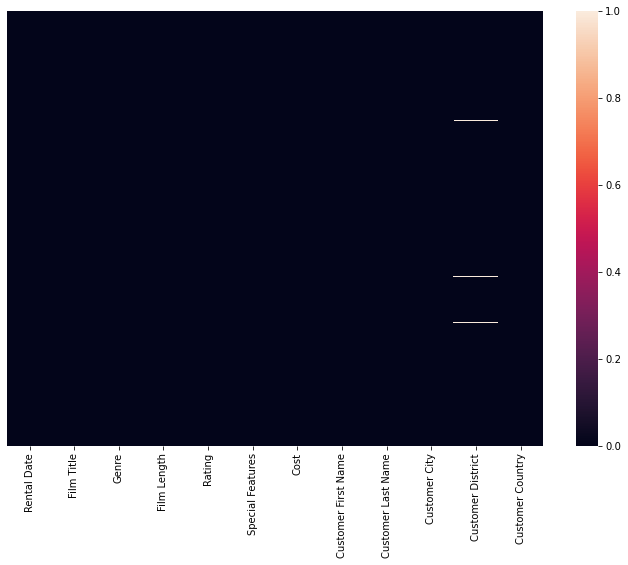

In [4]:
plt.figure(figsize=(12,8));
sns.heatmap(film.isnull(),yticklabels=False);

It appears that the "Customer District" variable contains a few null values.

We can also check the number of observations in the dataset:

In [5]:
len(film)

16044

The film dataset contains a little over 16000 rentals done by cutomers all over the world.

We can start our analysis by creating a column which contains the customers' first and last names together by concatenating the columns "Customer First Name" and "Customer Last Name":

In [6]:
film['Client']=film['Customer First Name']+' '+film['Customer Last Name']

Checking the head of the resulting dataframe:

In [7]:
film.head()

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country,Client
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy,Collazo,Qomsheh,Esfahan,Iran,Tommy Collazo
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel,Murrell,Jaffna,Northern,Sri Lanka,Manuel Murrell
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew,Purdy,Baku,Baki,Azerbaijan,Andrew Purdy
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores,Hansen,Jaroslavl,Jaroslavl,Russian Federation,Delores Hansen
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson,Christenson,Santiago de Compostela,Galicia,Spain,Nelson Christenson


Now, we can make the column "Customer First Name" have the same content as the column "Client", in order to have a single column with the customers' full names:

In [8]:
film['Customer First Name']=film['Client']

Additionally, we can rename the column "Customer First Name" to only "Customer":

In [9]:
film=film.rename(columns={'Customer First Name':'Customer'})

Finally, we can delete the columns "Customer Last Name" and "Client":

In [10]:
film.drop(['Customer Last Name'],axis=1,inplace=True)
film.drop(['Client'],axis=1,inplace=True)

Checking the head of the resulting dataframe:

In [11]:
film.head()

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer,Customer City,Customer District,Customer Country
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy Collazo,Qomsheh,Esfahan,Iran
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel Murrell,Jaffna,Northern,Sri Lanka
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew Purdy,Baku,Baki,Azerbaijan
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores Hansen,Jaroslavl,Jaroslavl,Russian Federation
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson Christenson,Santiago de Compostela,Galicia,Spain


The next step is to check the amount of customers that we have in the dataframe. We can use the nunique() function to perform this:

In [12]:
film['Customer'].nunique()

599

We have 599 customers from all over the world in the dataframe. The different ratings that a movie can have can also be checked:

In [13]:
film['Rating'].unique()

array(['R', 'G', 'NC-17', 'PG-13', 'PG'], dtype=object)

The different prices that a movie can have can be checked too:

In [14]:
film['Cost'].unique()

array([2.99, 0.99, 4.99])

Additionally, the possible genres for a movie in the dataframe can be obtained:

In [15]:
film['Genre'].unique()

array(['Music', 'Children', 'Horror', 'Comedy', 'Animation', 'Foreign',
       'Drama', 'Travel', 'Family', 'Documentary', 'Sci-Fi', 'Action',
       'Games', 'Sports', 'New', 'Classics'], dtype=object)

It would be beneficial if the customers could be classified in terms of their gender (male or female). In order to do this, an extra library must be imported:

In [16]:
import gender_guesser.detector as gender

Then, an instance of the Gender Dectector can be initiated:

In [17]:
d=gender.Detector()

Now, we can create a new column in the dataframe called "Gender" and use a combination of lambda functions to establish the gender of the customers:

In [18]:
film['Gender']=film['Customer'].apply(lambda x: x.split(' ')[0]).apply(lambda x: d.get_gender(x))

Checking the head of the resulting dataframe:

In [19]:
film.head()

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer,Customer City,Customer District,Customer Country,Gender
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy Collazo,Qomsheh,Esfahan,Iran,male
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel Murrell,Jaffna,Northern,Sri Lanka,male
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew Purdy,Baku,Baki,Azerbaijan,male
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores Hansen,Jaroslavl,Jaroslavl,Russian Federation,female
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson Christenson,Santiago de Compostela,Galicia,Spain,male


Now, we can start by determining the most frequent customers by sorting the column "Cost" in descending order, grouping by the "Customer" column:

In [20]:
film.groupby('Customer').sum().sort_values(by='Cost',ascending=False)['Cost'].head(10)

Customer
Eleanor Hunt      147.54
Karl Seal         138.55
Clara Shaw        135.58
Marion Snyder     134.61
Tommy Collazo     131.62
Rhonda Kennedy    126.61
Curtis Irby       121.62
Marcia Dean       121.58
Harry Arce        118.65
Mike Way          118.65
Name: Cost, dtype: float64

And we can also establish the most frequent customers based on the number of rentals performed:

In [21]:
film.groupby('Customer').count().sort_values(by='Rental Date',ascending=False)['Rental Date'].head(10)

Customer
Eleanor Hunt      46
Karl Seal         45
Marcia Dean       42
Clara Shaw        42
Tammy Sanders     41
Wesley Bull       40
Sue Peters        40
Marion Snyder     39
Tim Cary          39
Rhonda Kennedy    39
Name: Rental Date, dtype: int64

Clearly, the 10 most frequent customers are in the list above. Hence, we can now establish the customers who will be given a "Premium" status, based on their total spent, and who are the customers who will be "Standard". As a generic rule, we will establish that, if a customer has spent at least 100 dollars in film rental, he or she will be "Premium", otherwise he or she will be "Standard". A custom lambda function can be created that does this customer sorting:

In [22]:
Customer_Category=film.groupby('Customer').sum()['Cost'].apply(lambda x: "Premium" if x>=100 else "Standard")

Checking the head of this new series:

In [23]:
Customer_Category.head(10)

Customer
Aaron Selby          Standard
Adam Gooch           Standard
Adrian Clary         Standard
Agnes Bishop         Standard
Alan Kahn            Standard
Albert Crouse        Standard
Alberto Henning      Standard
Alex Gresham          Premium
Alexander Fennell     Premium
Alfred Casillas      Standard
Name: Cost, dtype: object

Counting the number of "Premium" and "Standard" customers:

In [24]:
Customer_Category[Customer_Category=='Standard'].count()

535

In [25]:
Customer_Category[Customer_Category=='Premium'].count()

64

We can now use a countplot to visualize the two categories of customers:

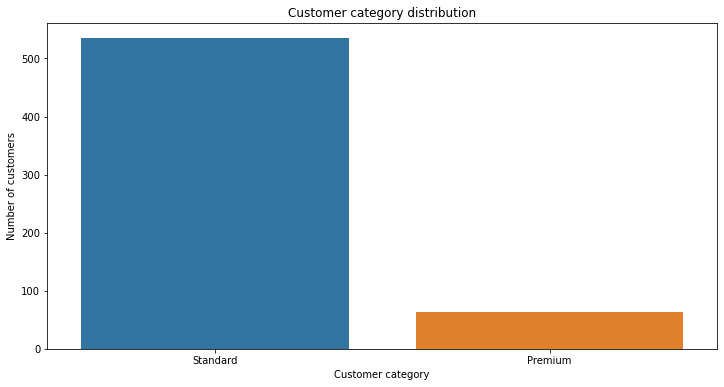

In [26]:
plt.figure(figsize=(12,6))
fig=sns.countplot(x=Customer_Category,data=Customer_Category)
fig.set(xlabel='Customer category',ylabel='Number of customers',title='Customer category distribution');

As expected, the number of "Premium" customers is much lower than the "Standard" ones. The "Premium" customers make up about 11% of the total.

We can also establish the top movies in terms of total monetary amount of rentals, in descending order. Similarly to what was done for the most frequent customers, the groupby() method can be used and a new Series called "top_movies" can be created to display the results:

In [27]:
top_movies=film.groupby('Film Title').sum().sort_values(by='Cost',ascending=False)['Cost'].head(10)

In [28]:
top_movies

Film Title
Bucket Brotherhood    169.66
Scalawag Duck         159.68
Zorro Ark             154.69
Goodfellas Salute     154.69
Apache Divine         154.69
Wife Turn             154.69
Cat Coneheads         149.70
Massacre Usual        149.70
Dogma Family          149.70
Witches Panic         149.70
Name: Cost, dtype: float64

Displaying these results in a graph:

In [29]:
top_movies.iplot(kind='bar',title='Top movies rented',xTitle='Movie',yTitle='Total amount in rentals ($)',yaxis_range=[145,170],colorscale='-plotly')

Bucket Brotherhood is the top rented movie in the dataset, and the top 10 rented movies show a uniform distribution, with only a 20 dollar difference between the first movie in the "top_movies" Series and the tenth one.

At this point, we can establish the hour, day and month when each film rental happened. A simple lambda function can perform this. First, for the hour:

In [30]:
film['Rental Hour'] = film['Rental Date'].apply(lambda time: time.hour)

And, now, for the day of the week:

In [31]:
film['Rental Day of Week'] = film['Rental Date'].apply(lambda time: time.dayofweek)

We can now use a dictionary to map the days of the week in order for the column "Day of Week" to return the actual day of the week, rather than just an integer:

In [32]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

Applying this dictionary into the dataframe:

In [33]:
film['Rental Day of Week']=film['Rental Day of Week'].map(dmap)

Lastly, we can perform the same procedure for the month:

In [34]:
film['Rental Month'] = film['Rental Date'].apply(lambda time: time.month)

Checking the head of the resulting dataframe:

In [35]:
film.head()

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer,Customer City,Customer District,Customer Country,Gender,Rental Hour,Rental Day of Week,Rental Month
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy Collazo,Qomsheh,Esfahan,Iran,male,22,Sun,5
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel Murrell,Jaffna,Northern,Sri Lanka,male,23,Sun,5
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew Purdy,Baku,Baki,Azerbaijan,male,23,Sun,5
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores Hansen,Jaroslavl,Jaroslavl,Russian Federation,female,23,Sun,5
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson Christenson,Santiago de Compostela,Galicia,Spain,male,23,Sun,5


At this step, we can analyze the total amount of spendings in movie rental per hour for each day of the week, in order to know when the customers all over the world are mostly performing the purchases. We can use the unstack() method with groupby() for this:

In [36]:
day_hour=film.groupby(by=['Rental Day of Week','Rental Hour']).sum()['Cost'].unstack()

In [37]:
day_hour

Rental Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Rental Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,250.15,270.13,292.96,354.80,250.17,283.99,292.07,254.21,318.90,302.96,...,318.96,299.00,278.05,293.99,302.01,319.91,300.94,235.12,219.24,285.10
Mon,320.94,289.06,214.33,309.00,270.03,248.13,225.24,272.07,230.17,292.07,...,231.16,287.02,290.92,268.05,322.98,231.18,264.05,325.85,294.03,282.07
Sat,341.97,303.97,276.05,262.07,334.90,274.07,258.11,252.15,272.07,273.10,...,224.23,298.98,239.16,240.17,269.04,296.98,251.14,277.04,238.09,275.04
Sun,365.81,292.05,283.04,302.98,303.99,324.94,269.10,255.08,306.01,249.10,...,290.05,799.16,323.99,214.21,292.98,260.05,286.05,255.12,232.15,269.12
Thu,315.99,301.00,257.12,296.03,240.15,283.04,308.01,295.00,346.82,256.13,...,304.94,341.83,264.09,285.02,322.98,277.06,286.07,296.03,205.20,305.04
Tue,260.13,219.22,268.05,230.11,327.99,226.27,275.02,308.92,263.04,260.15,...,336.94,287.04,216.19,299.04,239.14,279.06,287.04,251.08,248.19,264.09
Wed,262.07,267.08,236.15,258.17,294.96,301.08,294.98,316.90,272.03,309.97,...,230.19,241.10,286.96,257.18,299.99,287.00,254.13,296.05,291.00,259.12


A heatmap would be ideal to visualize the distribution above:

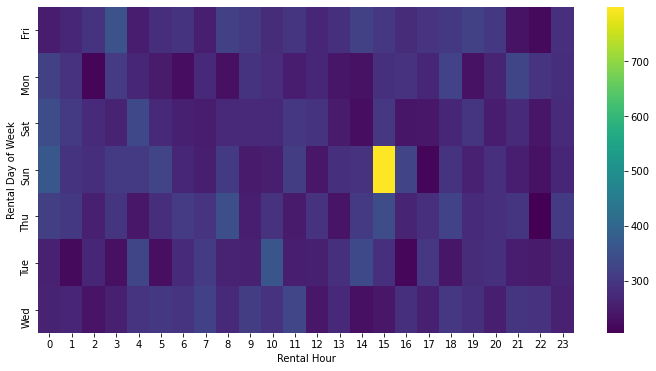

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour,cmap='viridis');

Now, a clustermap can be built to sort the data:

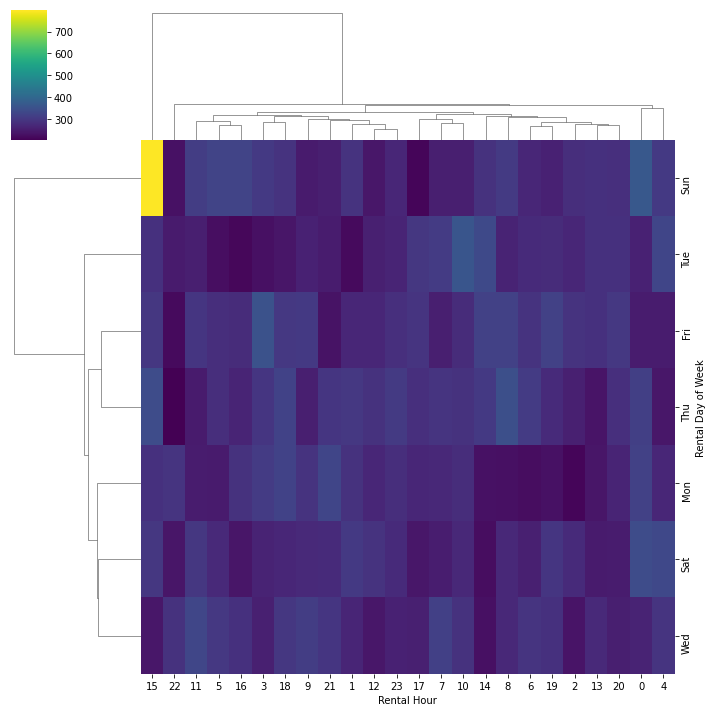

In [39]:
sns.clustermap(day_hour,cmap='viridis');

It can be observed that the day of week and hour when there is a spike of movie rentals is on Sundays at 3 PM.

Since the value of movie rentals on Sundays at 3 PM ($ 799.16) is much higher than the great majority of the other values in the previous DataFrame, we can analyze the same movie rental data, but without the spike on Sundays:

In [40]:
day_hour_adjusted=day_hour
day_hour_adjusted.loc['Sun',15]=np.nan
day_hour_adjusted

Rental Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Rental Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,250.15,270.13,292.96,354.80,250.17,283.99,292.07,254.21,318.90,302.96,...,318.96,299.00,278.05,293.99,302.01,319.91,300.94,235.12,219.24,285.10
Mon,320.94,289.06,214.33,309.00,270.03,248.13,225.24,272.07,230.17,292.07,...,231.16,287.02,290.92,268.05,322.98,231.18,264.05,325.85,294.03,282.07
Sat,341.97,303.97,276.05,262.07,334.90,274.07,258.11,252.15,272.07,273.10,...,224.23,298.98,239.16,240.17,269.04,296.98,251.14,277.04,238.09,275.04
Sun,365.81,292.05,283.04,302.98,303.99,324.94,269.10,255.08,306.01,249.10,...,290.05,NaN,323.99,214.21,292.98,260.05,286.05,255.12,232.15,269.12
Thu,315.99,301.00,257.12,296.03,240.15,283.04,308.01,295.00,346.82,256.13,...,304.94,341.83,264.09,285.02,322.98,277.06,286.07,296.03,205.20,305.04
Tue,260.13,219.22,268.05,230.11,327.99,226.27,275.02,308.92,263.04,260.15,...,336.94,287.04,216.19,299.04,239.14,279.06,287.04,251.08,248.19,264.09
Wed,262.07,267.08,236.15,258.17,294.96,301.08,294.98,316.90,272.03,309.97,...,230.19,241.10,286.96,257.18,299.99,287.00,254.13,296.05,291.00,259.12


Plotting a new heatmap without the spike:

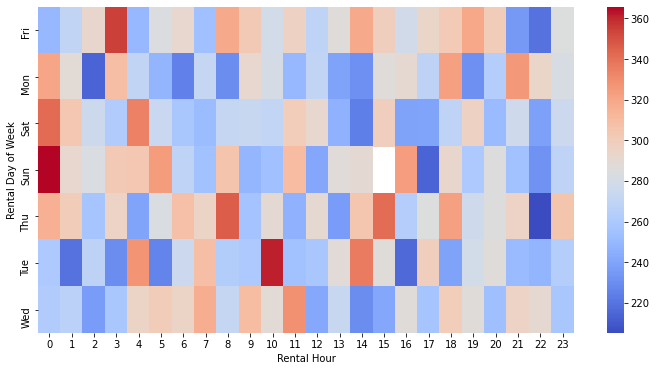

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour_adjusted,cmap='coolwarm');

And its respective clustermap:

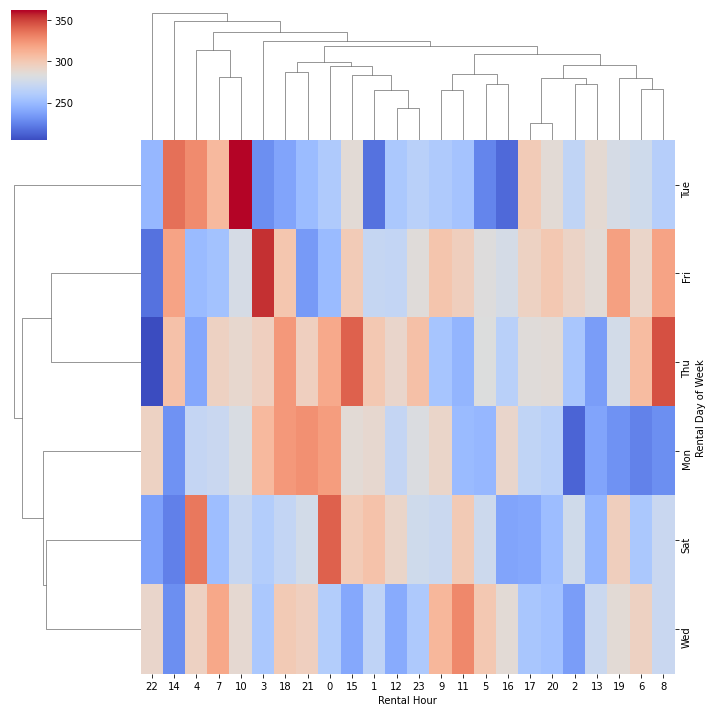

In [42]:
sns.clustermap(day_hour_adjusted.dropna(),cmap='coolwarm');

From the previous two graphs, we can observe that, apart from Sundays at 3 PM, high amounts of movie rentals occur on Fridays at 3 AM and on Tuesdays at 10 AM, along with Sundays at midnight.

The distribution of monetary amount of movie rentals per month and day of week can also be analyzed. Similar to what was done above, a heatmap can be constructed. It must be noted that, since the film dataset was based on a viewing experiment, not all of the months of the year will be present in the dataset. First, using the unstack() method:

In [43]:
day_month = film.groupby(by=['Rental Day of Week','Rental Month']).sum()['Cost'].unstack()

Now, just to make sure that the dataframe "day_month" does not have null values:

In [44]:
day_month=day_month.dropna(axis=1)

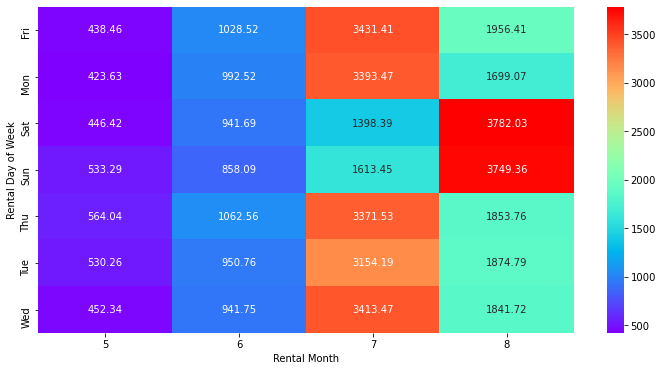

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(day_month,cmap='rainbow',annot=True,fmt='g');

The clustermap of this distribution is shown below:

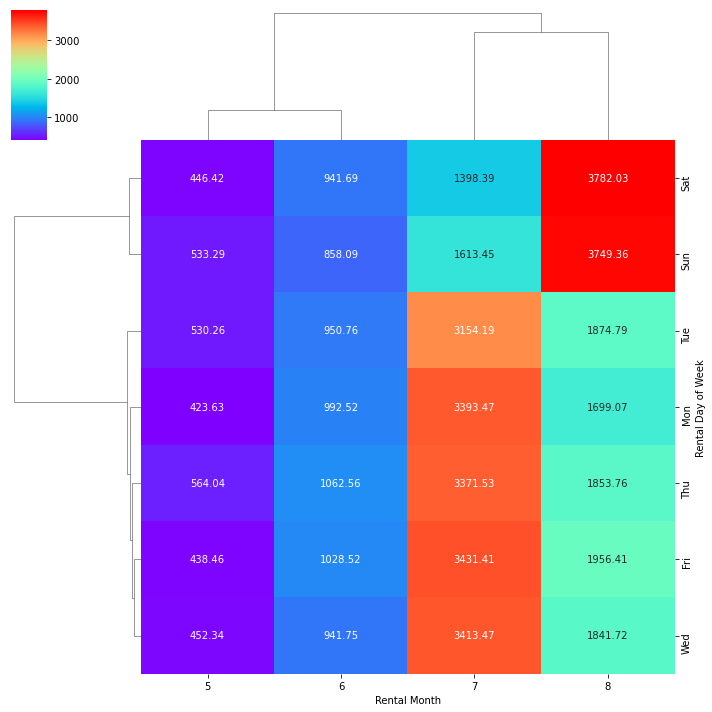

In [46]:
sns.clustermap(day_month,cmap='rainbow',annot=True,fmt='g');

We can clearly observe that movie rentals spike on Sunday and Saturday of month 8 (August), and also on Wednesday and Friday of month 7 (July).

The monetary amount of movie rentals can also be plotted with respect to time in the year of 2020, in order for us to analyze whether the movie rentals are increasing or decreasing. This can be done by a simple groupby() method on the "film" DataFrame:

In [47]:
rental_by_month=film.groupby('Rental Month').sum()['Cost']
rental_by_month

Rental Month
2      514.18
5     3388.44
6     6775.89
7    19775.91
8    16757.14
Name: Cost, dtype: float64

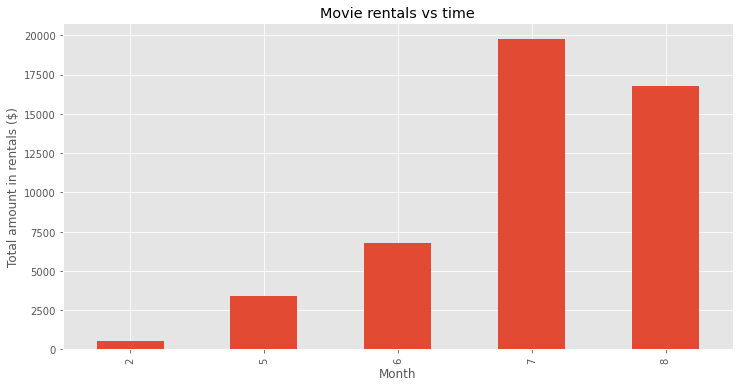

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
rental_by_month.plot(kind='bar');
plt.ylabel('Total amount in rentals ($)');
plt.xlabel('Month');
plt.title('Movie rentals vs time');

It can be clearly seen from the bar graph above that the monetary amount of movie rentals shows an overall increase over time in the year of 2020, except for the month of August, where the sales dropped approximately $ 3,000. It must be noted that, since the film dataset was based on a viewing experiment, not all of the months of the year will be present in the dataset.

At this step, the column "Special Features" can be analyzed. Fisrt, we can find out the unique values in this column:

In [49]:
film['Special Features'].unique()

array(['Trailers,  Behind the Scenes', 'Trailers, Behind the Scenes',
       'Trailers', 'Commentaries, Behind the Scenes',
       'Trailers, Commentaries', 'Deleted Scenes, Behind the Scenes',
       'Commentaries, Deleted Scenes, Behind the Scenes',
       'Trailers, Commentaries, Deleted Scenes', 'Behind the Scenes',
       'Trailers, Deleted Scenes, Behind the Scenes',
       'Commentaries, Deleted Scenes', 'Commentaries',
       'Trailers, Commentaries, Behind the Scenes',
       'Trailers, Deleted Scenes', 'Deleted Scenes',
       'Trailers, Commentaries, Deleted Scenes, Behind the Scenes'],
      dtype=object)

It looks like the movies in the dataset contain the following special features: trailers, behind the scenes, deleted scenes and commentaries. We can now determine the amount of movies in the dataframe which contain trailers by defining a specific function:

In [50]:
def trailers(string):
    for i in string.split():
        if i=='Trailers' or i=='Trailers,':
            return 1
    return 0

Applying this function on the dataframe:

In [51]:
film['Trailers']=film['Special Features'].apply(trailers)

Checking the head of the dataframe:

In [52]:
film.head()

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer,Customer City,Customer District,Customer Country,Gender,Rental Hour,Rental Day of Week,Rental Month,Trailers
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy Collazo,Qomsheh,Esfahan,Iran,male,22,Sun,5,1
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel Murrell,Jaffna,Northern,Sri Lanka,male,23,Sun,5,1
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew Purdy,Baku,Baki,Azerbaijan,male,23,Sun,5,1
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores Hansen,Jaroslavl,Jaroslavl,Russian Federation,female,23,Sun,5,1
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson Christenson,Santiago de Compostela,Galicia,Spain,male,23,Sun,5,0


The movies that contain trailers are marked with 1 in the column "Trailers", whereas the ones which do not contain trailers are marked with a 0. If we group the dataframe in terms of the column "Film Title", since the movies repeat themselves, a new dataframe called "movie" can be created:

In [53]:
movie=film.groupby('Film Title').sum()

Resetting the index of the dataframe:

In [54]:
movie=movie.reset_index()

Finally, the dataframe "movie" looks like the following:

In [55]:
movie

,Film Title,Film Length,Cost,Rental Hour,Rental Month,Trailers
0,Academy Dinosaur,1978,22.77,293,163,0
1,Ace Goldfinger,336,34.93,72,48,7
2,Adaptation Holes,600,35.88,160,87,12
3,Affair Prejudice,2691,68.77,278,156,0
4,African Egg,1560,35.88,103,78,0
...,...,...,...,...,...,...
953,Young Language,1281,6.93,62,51,7
954,Youth Kick,1074,5.94,55,44,6
955,Zhivago Core,945,8.91,79,56,0
956,Zoolander Fiction,1717,50.83,175,122,17


In order to determine the total amount of movies that contain trailers, a lambda function can be created to add another column in the dataframe "movie":

In [56]:
movie['trailers_true']=movie['Trailers'].apply(lambda x: 0 if x==0 else 1)

In [57]:
movie

,Film Title,Film Length,Cost,Rental Hour,Rental Month,Trailers,trailers_true
0,Academy Dinosaur,1978,22.77,293,163,0,0
1,Ace Goldfinger,336,34.93,72,48,7,1
2,Adaptation Holes,600,35.88,160,87,12,1
3,Affair Prejudice,2691,68.77,278,156,0,0
4,African Egg,1560,35.88,103,78,0,0
...,...,...,...,...,...,...,...
953,Young Language,1281,6.93,62,51,7,1
954,Youth Kick,1074,5.94,55,44,6,1
955,Zhivago Core,945,8.91,79,56,0,0
956,Zoolander Fiction,1717,50.83,175,122,17,1


In order to list the all the movies that contain Trailers as a Special Feature and their respective cumulative cost, we can create a new DataFrame (movie_spec_feature) with only this data. This data will be important when analyzing whether the movies with more special features are more expensive or not.

In [58]:
spec_feature={'Film Title':movie['Film Title'],'Cumulative Cost':movie['Cost'],'Trailer':movie['trailers_true']}
movie_spec_feature=pd.DataFrame(spec_feature)
movie_spec_feature

,Film Title,Cumulative Cost,Trailer
0,Academy Dinosaur,22.77,0
1,Ace Goldfinger,34.93,1
2,Adaptation Holes,35.88,1
3,Affair Prejudice,68.77,0
4,African Egg,35.88,0
...,...,...,...
953,Young Language,6.93,1
954,Youth Kick,5.94,1
955,Zhivago Core,8.91,0
956,Zoolander Fiction,50.83,1


Now, if we add the column "trailers_true" on the movie DataFrame, we can determine the total number of films which contain trailers and store in a variable "total_trailers":

In [59]:
movie['trailers_true'].sum()

507

In [60]:
total_trailers=movie['trailers_true'].sum()

We can perform the same procedure for the other special features. Doing the analysis on the feature "Behind the Scenes":

In [61]:
def behind_scenes(string):
    for i in string.split():
        if i=='Behind':
            return 1
    return 0

Applying this function on the "film" dataframe and performing the same procedure from above:

In [62]:
film['Behind_Scenes']=film['Special Features'].apply(behind_scenes)

In [63]:
movie=film.groupby('Film Title').sum()

In [64]:
movie['behind_scenes_true']=movie['Behind_Scenes'].apply(lambda x: 0 if x==0 else 1)

Adding the column corresponding to the feature "Behind the Scenes" to the movie_spec_feature DataFrame, we obtain:

In [65]:
movie_spec_feature['Behind Scenes']=movie['behind_scenes_true'].values
movie_spec_feature

,Film Title,Cumulative Cost,Trailer,Behind Scenes
0,Academy Dinosaur,22.77,0,1
1,Ace Goldfinger,34.93,1,0
2,Adaptation Holes,35.88,1,0
3,Affair Prejudice,68.77,0,1
4,African Egg,35.88,0,0
...,...,...,...,...
953,Young Language,6.93,1,1
954,Youth Kick,5.94,1,1
955,Zhivago Core,8.91,0,0
956,Zoolander Fiction,50.83,1,0


In [66]:
movie['behind_scenes_true'].sum()

515

In [67]:
total_behind_scenes=movie['behind_scenes_true'].sum()

Now, doing the same for the feature "Commentaries":

In [68]:
def commentaries(string):
    for i in string.split():
        if i=='Commentaries,' or i=='Commentaries':
            return 1
    return 0

In [69]:
film['Commentaries']=film['Special Features'].apply(commentaries)

In [70]:
movie=film.groupby('Film Title').sum()

In [71]:
movie['commentaries_true']=movie['Commentaries'].apply(lambda x: 0 if x==0 else 1)

Adding the column corresponding to the feature "Commentaries" to the movie_spec_feature DataFrame, we obtain:

In [72]:
movie_spec_feature['Commentaries']=movie['commentaries_true'].values
movie_spec_feature

,Film Title,Cumulative Cost,Trailer,Behind Scenes,Commentaries
0,Academy Dinosaur,22.77,0,1,0
1,Ace Goldfinger,34.93,1,0,0
2,Adaptation Holes,35.88,1,0,0
3,Affair Prejudice,68.77,0,1,1
4,African Egg,35.88,0,0,0
...,...,...,...,...,...
953,Young Language,6.93,1,1,0
954,Youth Kick,5.94,1,1,0
955,Zhivago Core,8.91,0,0,0
956,Zoolander Fiction,50.83,1,0,0


In [73]:
movie['commentaries_true'].sum()

516

In [74]:
total_commentaries=movie['commentaries_true'].sum()

Finally, performing the same procedure on the final special feature "Deleted Scenes":

In [75]:
def deleted_scenes(string):
    for i in string.split():
        if i=='Deleted':
            return 1
    return 0

In [76]:
film['Deleted Scenes']=film['Special Features'].apply(deleted_scenes)

In [77]:
movie=film.groupby('Film Title').sum()

In [78]:
movie['deleted_scenes_true']=movie['Deleted Scenes'].apply(lambda x: 0 if x==0 else 1)

Adding the column corresponding to the feature "Deleted Scenes" to the movie_spec_feature DataFrame, we obtain:

In [79]:
movie_spec_feature['Deleted Scenes']=movie['deleted_scenes_true'].values
movie_spec_feature

,Film Title,Cumulative Cost,Trailer,Behind Scenes,Commentaries,Deleted Scenes
0,Academy Dinosaur,22.77,0,1,0,1
1,Ace Goldfinger,34.93,1,0,0,1
2,Adaptation Holes,35.88,1,0,0,1
3,Affair Prejudice,68.77,0,1,1,0
4,African Egg,35.88,0,0,0,1
...,...,...,...,...,...,...
953,Young Language,6.93,1,1,0,0
954,Youth Kick,5.94,1,1,0,0
955,Zhivago Core,8.91,0,0,0,1
956,Zoolander Fiction,50.83,1,0,0,1


With the DataFrame movie_spec_feature completed, we can create another column in this DataFrame called "Total Special Features", in order to calculate, for each movie, the total number of special features:

In [80]:
movie_spec_feature['Total Special Features']=movie_spec_feature['Trailer']+movie_spec_feature['Behind Scenes']+movie_spec_feature['Commentaries']+movie_spec_feature['Deleted Scenes']
movie_spec_feature

,Film Title,Cumulative Cost,Trailer,Behind Scenes,Commentaries,Deleted Scenes,Total Special Features
0,Academy Dinosaur,22.77,0,1,0,1,2
1,Ace Goldfinger,34.93,1,0,0,1,2
2,Adaptation Holes,35.88,1,0,0,1,2
3,Affair Prejudice,68.77,0,1,1,0,2
4,African Egg,35.88,0,0,0,1,1
...,...,...,...,...,...,...,...
953,Young Language,6.93,1,1,0,0,2
954,Youth Kick,5.94,1,1,0,0,2
955,Zhivago Core,8.91,0,0,0,1,1
956,Zoolander Fiction,50.83,1,0,0,1,2


Finally, we can count the number of rentals for each movie, by appplying a groupby() method. This will be the final change on the movie_spec_feature DataFrame:

In [81]:
by_rentals=film.groupby('Film Title').count()['Rental Date']
movie_spec_feature['Number of rentals']=by_rentals.values
movie_spec_feature['Rental Cost']=movie_spec_feature['Cumulative Cost']/movie_spec_feature['Number of rentals']
movie_spec_feature

,Film Title,Cumulative Cost,Trailer,Behind Scenes,Commentaries,Deleted Scenes,Total Special Features,Number of rentals,Rental Cost
0,Academy Dinosaur,22.77,0,1,0,1,2,23,0.99
1,Ace Goldfinger,34.93,1,0,0,1,2,7,4.99
2,Adaptation Holes,35.88,1,0,0,1,2,12,2.99
3,Affair Prejudice,68.77,0,1,1,0,2,23,2.99
4,African Egg,35.88,0,0,0,1,1,12,2.99
...,...,...,...,...,...,...,...,...,...
953,Young Language,6.93,1,1,0,0,2,7,0.99
954,Youth Kick,5.94,1,1,0,0,2,6,0.99
955,Zhivago Core,8.91,0,0,0,1,1,9,0.99
956,Zoolander Fiction,50.83,1,0,0,1,2,17,2.99


Continuing with the count of number of movies which have Deleted Scenes:

In [82]:
movie['deleted_scenes_true'].sum()

478

In [83]:
total_deleted_scenes=movie['deleted_scenes_true'].sum()

In order to show a summary of the amount of movies that exhibit each category of special feature, we can create a small dataframe called "spec_features":

In [84]:
spec_features=pd.DataFrame([total_trailers,total_behind_scenes,total_commentaries,total_deleted_scenes],index=['Trailers','Behind the Scenes','Commentaries','Deleted Scenes'],columns=['Special Feature'])

Checking the resulting dataframe:

In [85]:
spec_features

,Special Feature
Trailers,507
Behind the Scenes,515
Commentaries,516
Deleted Scenes,478


In [86]:
spec_features.iplot(kind='bar',title='Movie special features',xTitle='Special feature',yTitle='Count',yaxis_range=[470,520],color='red')

The graph above shows that the special features of Trailers, Behind the Scenes and Commentaries for movies are relatively uniformely distributed among the movies in the dataset, and the Commentaries are the most common special feature among the movies in the dataset. Deleted Scenes is the least common feature.

We can now analyze whether the movies with more special features are more expensive to rent. This can be done by applying a groupby() method on the movie_spec_feature DataFrame, along with the mean of the rental cost of the movies that fit in each category of quantity of special features (1, 2, 3 or 4):

In [87]:
by_spec_feature=movie_spec_feature.groupby('Total Special Features').mean()['Rental Cost']
by_spec_feature

Total Special Features
1    3.021128
2    2.979975
3    2.998097
4    2.662727
Name: Rental Cost, dtype: float64

In [88]:
by_spec_feature.iplot(kind='bar',title='Average Rental Cost of Movies vs Amount of Special Features',xTitle='Number of Special Features',yTitle='Average Rental Cost ($)',yaxis_range=[2.5,3.2],xaxis_tickvals=[1,2,3,4],color='green')

From the observation of the graph above, we can see that the average rental cost of the movies does not vary significantly with the amount of special feature (trailers, behind the scenes, commentaries and deleted scenes) they have, since the values are considerably close to each other, with only the movies with all four special features showing a lower average rental cost. Hence, we can conclude that the amount of special features that a movie exhibits does not play a relevant part on its rental cost.

We can also visualize, from the movie_spec_feature DataFrame, whether the number of rentals of a movie varies accoring to its amount of special features:

In [89]:
by_amount_rental=movie_spec_feature.groupby('Total Special Features').sum()['Number of rentals']
by_amount_rental

Total Special Features
1    4403
2    6504
3    4134
4    1003
Name: Number of rentals, dtype: int64

In [90]:
by_amount_rental.iplot(kind='bar',title='Total Number of Rentals of Movies vs Amount of Special Features',xTitle='Number of Special Features',yTitle='Total Number of Rentals',xaxis_tickvals=[1,2,3,4],color='orange')

From the graph above, a trend between the number of special features in movies and the total number of rentals cannot be clealy observed. The total number of movie rentals soars from 1 special feature to 2 special features, and then descends, reaching its lowest point with 4 special features.

At this point, since we already have the total amount of each category on the "Special Feature" column on the "film" Dataframe and the special feature analysis is done, we can delete the auxiliary columns that helped us build "spec_features":

In [91]:
film.drop(['Trailers'],axis=1,inplace=True)
film.drop(['Behind_Scenes'],axis=1,inplace=True)
film.drop(['Commentaries'],axis=1,inplace=True)
film.drop(['Deleted Scenes'],axis=1,inplace=True)

The next analysis will be regarding the customers' location. We can determine which countries show the greatest amount of spendings in terms of movie rental based on the dataframe:

In [92]:
by_country=film.groupby('Customer Country').sum().sort_values(by='Cost',ascending=False)['Cost'].head(10)

In [93]:
by_country

Customer Country
India                 4660.28
China                 4075.74
United States         2838.32
Japan                 2496.75
Mexico                2358.04
Brazil                2214.52
Russian Federation    2135.87
Philippines           1656.32
Turkey                1168.12
Nigeria               1058.48
Name: Cost, dtype: float64

It looks like India and China are very interesting markets, followed by the United States, Japan, Mexico and Brazil.

Plotting these results in a graph:

In [94]:
by_country.iplot(kind='bar',title='Total Spending in Movie Rental per Country',xTitle='Country',yTitle='Total Spending ($)',color='yellow')

Another interesting analysis regards the most popular film genres in the dataset. This is determined with the line of code below, where a series called "by_genre" is created:

In [95]:
by_genre=film.groupby('Genre').count().sort_values(by='Rental Date',ascending=False)['Rental Date']

In [96]:
by_genre

Genre
Sports         1179
Animation      1166
Action         1112
Sci-Fi         1101
Family         1096
Drama          1060
Documentary    1050
Foreign        1033
Games           969
Children        945
Comedy          941
New             940
Classics        939
Horror          846
Travel          837
Music           830
Name: Rental Date, dtype: int64

Sports movies are the most popular among the customers, followed by animation (very popular among children), action and Sci-Fi. The least popular movie genre is music.

Plotting these results in a graph:

In [97]:
by_genre.iplot(kind='bar',title='Total Count of Movies vs Film Genre',xTitle='Film Genre',yTitle='Total Count',yaxis_range=[800,1200],color='blue')

At this step, we can alalyze the length of the movies in minutes. We can start by defining a custom function, which considers that a "Short" movie would be less than 60 minutes, a "Medium" length movie would be between 1 hour and 3 hours long and, finally, a "Long" movie would be over 3 hours long:

In [98]:
def length(movie):
    if movie<=60:
        return "Short"
    elif movie<180:
        return "Medium"
    else:
        return "Long"

Applying this function in the "film" dataframe and adding a column named "Length":

In [99]:
film['Length']=film['Film Length'].apply(length)

Checking the head of the "film" dataframe:

In [100]:
film.head()

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer,Customer City,Customer District,Customer Country,Gender,Rental Hour,Rental Day of Week,Rental Month,Length
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy Collazo,Qomsheh,Esfahan,Iran,male,22,Sun,5,Medium
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel Murrell,Jaffna,Northern,Sri Lanka,male,23,Sun,5,Medium
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew Purdy,Baku,Baki,Azerbaijan,male,23,Sun,5,Long
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores Hansen,Jaroslavl,Jaroslavl,Russian Federation,female,23,Sun,5,Medium
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson Christenson,Santiago de Compostela,Galicia,Spain,male,23,Sun,5,Medium


There are 3 possible values for the "Length" column: "Short", "Medium" or "Long". We can now use the pd.get_dummies() function to convert these categories into numbers:

In [101]:
length_dummies=pd.get_dummies(film['Length'])

In [102]:
length_dummies

,Long,Medium,Short
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
16039,0,1,0
16040,0,1,0
16041,0,1,0
16042,0,1,0


For example, the first entry in the "film" dataframe consists of a movie that is "Medium". That is why the column "Medium" equals 1 and the columns "Long" and "Short" are 0. Merging this "length_dummies" dataframe with the "film" dataframe:

In [103]:
film=pd.merge(film,length_dummies,on=film.index)
film.drop(['key_0'],axis=1,inplace=True)

Now, we can use the groupby() method to group the different film titles together:

In [104]:
movie=film.groupby('Film Title').sum()

In [105]:
movie

,Film Length,Cost,Rental Hour,Rental Month,Long,Medium,Short
Film Title,,,,,,,
Academy Dinosaur,1978,22.77,293,163,0,23,0
Ace Goldfinger,336,34.93,72,48,0,0,7
Adaptation Holes,600,35.88,160,87,0,0,12
Affair Prejudice,2691,68.77,278,156,0,23,0
African Egg,1560,35.88,103,78,0,12,0
...,...,...,...,...,...,...,...
Young Language,1281,6.93,62,51,7,0,0
Youth Kick,1074,5.94,55,44,0,6,0
Zhivago Core,945,8.91,79,56,0,9,0


A lambda function will help in counting the amount of movies of each length category:

In [106]:
long_movies=movie['Long'].apply(lambda x: 1 if x!=0 else 0).sum()
medium_movies=movie['Medium'].apply(lambda x: 1 if x!=0 else 0).sum()
short_movies=movie['Short'].apply(lambda x: 1 if x!=0 else 0).sum()

In [107]:
length_films=pd.DataFrame([long_movies,medium_movies,short_movies],index=['Long Movies','Medium Length Movies','Short Movies'],columns=['Count'])

In [108]:
length_films

,Count
Long Movies,44
Medium Length Movies,815
Short Movies,99


In [109]:
length_films.iplot(kind='bar',title='Total Amount of Movies vs Movie Length',xTitle='Movie Length',yTitle='Total Count',color='violet')

It is clear that the great majority of the movies are medium-length, between 1 and 3 hours long. We have a number of short movies (such as documentaries), followed by a shorter number of long movies (over 3 hours long).

With this table obtained, we can delete the columns for film length in the original dataframe "film":

In [110]:
film.drop(['Length'],axis=1,inplace=True)
film.drop(['Long'],axis=1,inplace=True)
film.drop(['Medium'],axis=1,inplace=True)
film.drop(['Short'],axis=1,inplace=True)

The next step would be to analyze the movie rating. What ratings do the most amount of movies belong to? In order to answer that question, we can use the groupby() method:

In [111]:
by_rating=film.groupby('Rating').count().sort_values(by='Rental Date',ascending=False)['Rental Date']

In [112]:
by_rating

Rating
PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: Rental Date, dtype: int64

In [113]:
by_rating.iplot(kind='bar',title='Total Number of Rentals vs Movie Rating',xTitle='Movie Rating',yTitle='Total Amount of Rentals',yaxis_range=[2700,3600],color='red')

We can clearly see that the most amount of rentals involved the rating "PG-13", but the total rentals per movie rating were very similar, with the rating "G" being the least common.

We can now perform a gender analysis of the customers. We can start by analyzing the unique values in the column "Gender" in the "film" dataframe:

In [114]:
film['Gender'].unique()

array(['male', 'female', 'mostly_male', 'mostly_female', 'andy'],
      dtype=object)

It is clear that the Gender Detector ran into some problems for a few customer first names, probably because some names can be used for both men and women. We can easily check the rows of the "film" dataframe in which the gender of the customer was identified as "andy":

In [115]:
film[film['Gender']=='andy']

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer,Customer City,Customer District,Customer Country,Gender,Rental Hour,Rental Day of Week,Rental Month
59,2020-05-25 09:01:57,Truman Crazy,Action,92,G,"Trailers, Commentaries",4.99,Jo Fowler,Oyo,Oyo & Osun,Nigeria,andy,9,Mon,5
174,2020-05-26 03:47:39,Cranes Reservoir,Sports,57,NC-17,Commentaries,2.99,Jo Fowler,Oyo,Oyo & Osun,Nigeria,andy,3,Tue,5
232,2020-05-26 11:47:20,Excitement Eve,Action,51,G,Commentaries,0.99,Casey Mena,Tokat,Tokat,Turkey,andy,11,Tue,5
634,2020-05-28 18:14:29,Games Bowfinger,Travel,119,PG-13,Behind the Scenes,4.99,Jo Fowler,Oyo,Oyo & Osun,Nigeria,andy,18,Thu,5
684,2020-05-29 00:32:09,Grease Youth,Family,135,G,"Trailers, Deleted Scenes",0.99,Jo Fowler,Oyo,Oyo & Osun,Nigeria,andy,0,Fri,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14581,2020-08-21 17:20:55,Lady Stage,Horror,67,PG,"Trailers, Deleted Scenes, Behind the Scenes",4.99,Jo Fowler,Oyo,Oyo & Osun,Nigeria,andy,17,Fri,8
14743,2020-08-21 23:08:33,Contact Anonymous,Travel,166,PG-13,Commentaries,2.99,Jackie Lynch,Buenaventura,Valle,Colombia,andy,23,Fri,8
14808,2020-08-22 01:12:14,Pity Bound,Drama,60,NC-17,Commentaries,4.99,Jo Fowler,Oyo,Oyo & Osun,Nigeria,andy,1,Sat,8
15028,2020-08-22 09:33:08,Expecations Natural,Travel,138,PG-13,Deleted Scenes,4.99,Jackie Lynch,Buenaventura,Valle,Colombia,andy,9,Sat,8


Looking at the names of the customers in the table above, it looks like the great majority of the first names are female names. Hence, we can write a function that fixes the "Gender" column:

In [116]:
def fix_gender(gender):
    if gender=='mostly_male':
        return "male"
    elif gender=='mostly_female':
        return "female"
    elif gender=='andy':
        return "female"
    else:
        return gender

Applying this function in the "Gender" column:

In [117]:
film['Gender']=film['Gender'].apply(fix_gender)

In [118]:
film['Gender'].unique()

array(['male', 'female'], dtype=object)

We now have only "male" or "female" for possible values in the column "Gender". Using the groupby() method to determine the amount of movie rentals done by women and men:

In [119]:
by_gender=film.groupby('Gender').count().sort_values(by='Rental Date',ascending=False)['Rental Date']

In [120]:
by_gender

Gender
female    8170
male      7874
Name: Rental Date, dtype: int64

In [121]:
by_gender.iplot(kind='bar',title='Gender Distribution for Movie Rentals',xTitle='Gender',yTitle='Total Number of Rentals',yaxis_range=[7500,8200],color='green')

There were more movie rentals done by women than by men, even though the absolute difference between the two categories is low.

At this step, another analysis can be performed: we can determine which are the cities within a specific country that show the greatest monetary amount of movie rentals in the "film" dataframe. Since there are a great number of countries in the dataset, we will analyze the top countries in terms of total spent on movie rentals, which are: India, China, United States and Japan.

We must first determine a list of countries within the column "Customer Country" in the "film" dataframe:

In [122]:
list_countries=[]
for i in film['Customer Country'].unique():
    list_countries.append(i)
list_countries

['Iran',
 'Sri Lanka',
 'Azerbaijan',
 'Russian Federation',
 'Spain',
 'United States',
 'Indonesia',
 'Brazil',
 'Pakistan',
 'United Kingdom',
 'Philippines',
 'India',
 'Mexico',
 'South Africa',
 'Senegal',
 'Zambia',
 'China',
 'Nigeria',
 'Romania',
 'Peru',
 'South Korea',
 'Chad',
 'Greenland',
 'Venezuela',
 'Vietnam',
 'Canada',
 'Yugoslavia',
 'France',
 'Puerto Rico',
 'Oman',
 'Myanmar',
 'Turkey',
 'Ukraine',
 'Yemen',
 'Angola',
 'Thailand',
 'Egypt',
 'Colombia',
 'Taiwan',
 'Japan',
 'Czech Republic',
 'Austria',
 'Argentina',
 'Italy',
 'Saudi Arabia',
 'Germany',
 'Faroe Islands',
 'Bolivia',
 'French Polynesia',
 'Morocco',
 'Latvia',
 'Mozambique',
 'Slovakia',
 'Liechtenstein',
 'Tonga',
 'Anguilla',
 'Algeria',
 'Chile',
 'Dominican Republic',
 'Poland',
 'Netherlands',
 'Nepal',
 'Estonia',
 'Paraguay',
 'United Arab Emirates',
 'Brunei',
 'Malaysia',
 'Israel',
 'Bangladesh',
 'Turkmenistan',
 'Kenya',
 'Madagascar',
 'French Guiana',
 'Congo,  The Democratic 

Now, we can create an array of smaller dataframes, in which each one coresponds to a specific country in the list created above:

In [123]:
countries=[]
for i in list_countries:
    countries.append(film[film['Customer Country']==str(i)].groupby('Customer City').sum().sort_values(by='Cost',ascending=False)['Cost'])

For simplification purposes, for each of the four countries mentioned before (India, China, United States and Japan), only the top 10 cities in terms of total spent on movie rental will be displayed.

For India:

In [124]:
countries[list_countries.index('India')].head(10)

Customer City
Valparai                118.65
Bijapur                 114.61
Halisahar               109.68
Bhilwara                107.68
Karnal                  106.65
Bhopal                  103.68
Patiala                  99.70
Rampur                   97.70
Chandrapur               97.68
Siliguri (Shiliguri)     97.66
Name: Cost, dtype: float64

In [125]:
countries[list_countries.index('India')].head(10).iplot(kind='bar',title='Top 10 Cities in India in Terms of Total Spent on Movie Rental',xTitle='City',yTitle='Total Spent on Movie Rental ($)',yaxis_range=[95,120],color='indigo')

For China:

In [126]:
countries[list_countries.index('China')].head(10)

Customer City
Changzhou        117.60
Lengshuijiang    111.64
Zhoushan         105.68
Fuyu             103.66
Leshan           101.68
Yinchuan          97.70
Yuncheng          97.70
Weifang           94.71
Binzhou           94.67
Qinhuangdao       93.68
Name: Cost, dtype: float64

In [127]:
countries[list_countries.index('China')].head(10).iplot(kind='bar',title='Top 10 Cities in China in Terms of Total Spent on Movie Rental',xTitle='City',yTitle='Total Spent on Movie Rental ($)',yaxis_range=[90,120],color='blue')

For the United States:

In [128]:
countries[list_countries.index('United States')].head(10)

Customer City
Aurora              157.50
Cape Coral          138.55
Memphis             113.66
Sterling Heights     98.71
Fontana              98.67
Lancaster            95.70
Salinas              93.70
Akron                90.69
Joliet               89.72
Greensboro           89.68
Name: Cost, dtype: float64

In [129]:
countries[list_countries.index('United States')].head(10).iplot(kind='bar',title='Top 10 Cities in USA in Terms of Total Spent on Movie Rental',xTitle='City',yTitle='Total Spent on Movie Rental ($)',yaxis_range=[80,160],color='green')

Finally, for Japan:

In [130]:
countries[list_countries.index('Japan')].head(10)

Customer City
Shimonoseki    105.64
Fukuyama       101.68
Ueda            99.68
Omiya           95.70
Iwakuni         94.71
Nagareyama      93.70
Sasebo          93.68
Hiroshima       91.70
Miyakonojo      90.71
Urawa           89.66
Name: Cost, dtype: float64

In [131]:
countries[list_countries.index('Japan')].head(10).iplot(kind='bar',title='Top 10 Cities in Japan in Terms of Total Spent on Movie Rental',xTitle='City',yTitle='Total Spent on Movie Rental ($)',yaxis_range=[85,110],color='orange')

At this step, another analysis that can be done regards the top movie genres in the four main countries in the film dataset: United States, India, China and Japan. For this to be achieved, a similar procedure can be done:

In [132]:
countries_genre=[]
for i in list_countries:
    countries_genre.append(film[film['Customer Country']==str(i)].groupby('Genre').sum().sort_values(by='Cost',ascending=False)['Cost'])

A dictionary of the four countries can be passed and the data can be shown in a single DataFrame:

In [133]:
dic_countries={'United States':countries_genre[list_countries.index('United States')],'India':countries_genre[list_countries.index('India')],'China':countries_genre[list_countries.index('China')],'Japan':countries_genre[list_countries.index('Japan')]}
top_genres_countries=pd.DataFrame(dic_countries)
top_genres_countries

,United States,India,China,Japan
Action,163.38,322.82,230.13,102.57
Animation,201.32,313.89,301.87,185.32
Children,143.44,296.94,238.11,137.50
Classics,133.46,284.96,225.12,133.48
Comedy,200.41,291.12,281.12,167.50
Documentary,205.26,300.86,228.13,167.40
Drama,230.31,332.03,305.95,216.37
Family,177.34,248.98,279.95,137.54
Foreign,193.36,334.94,219.16,131.56
Games,173.40,243.22,279.08,155.50


The table above shows the monetary sum of movie rentals in the four countries aforementioned, by genre. A heatmap can be now constructed to visualize the top movie genres for each country:

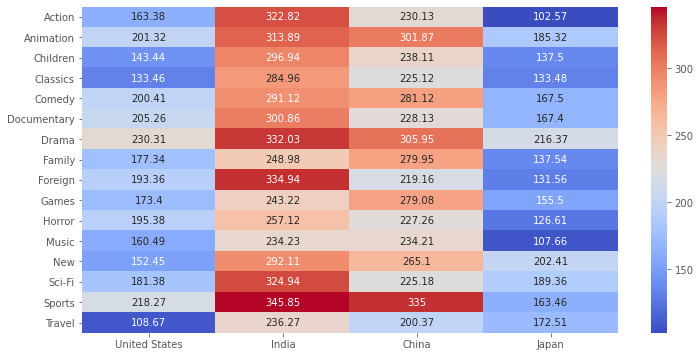

In [134]:
plt.figure(figsize=(12,6))
sns.heatmap(top_genres_countries,cmap='coolwarm',annot=True,fmt='g');

In order to group the top movie genres next to each other ], we can build a clustermap:

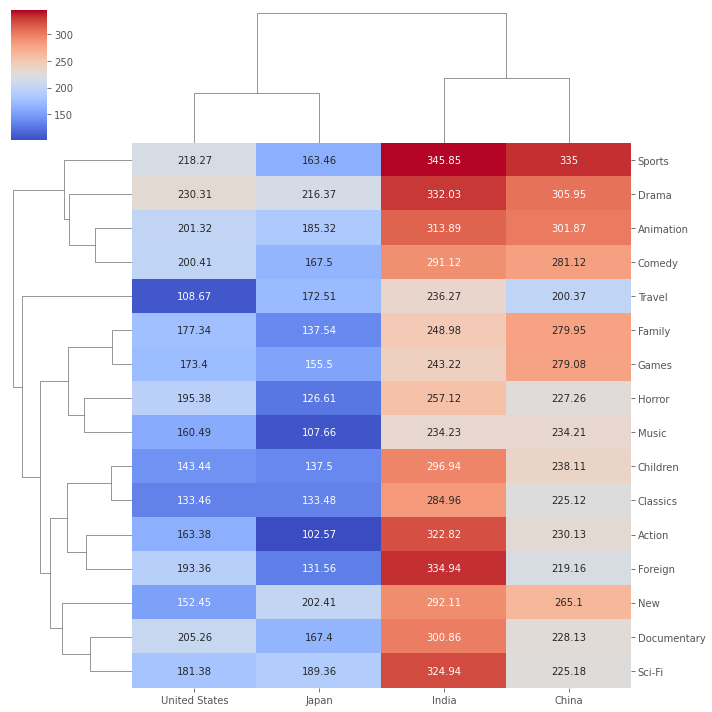

In [135]:
sns.clustermap(top_genres_countries,cmap='coolwarm',annot=True,fmt='g');

According to the previous figure, Sports movies in all four countries are very popular, along with Foreign movies in India.

In conclusion, the online film rental data set was very informative for our analysis. It showed very few missing values in the "Customer District" category and was already very well categorized in terms of the film title, genre, length, rating, special features and other categories. The main changes made in the dataset were generating a "Gender" category for each customer in each rental observation, applying a "Premium" feature to the top spending customers and, finally, splitting the rental date timestamp in terms of the hour, day of the week and month, in order to help in the time analysis of the movie rentals. 11% of the total amount of customers were given a "Premium" feature due to the amount of spendings that they have done in terms of film rental (at least one hundred US dollars). Additionally, another feature called "Length" was conferred to the data set, which established the short, medium length and long movies. Heat maps were constructed in order to identify peaks in terms of the hour, day of the week and month of the film rentals, and a considerable spike was observed on Sundays at 3 PM. Moreover, high amounts of movie rentals occurred on Fridays at 3 AM and also on Tuesdays at 10 AM, along with Sundays at midnight. In terms of the month, the movie rentals spiked on Sunday and Saturday of August and also on Wednesday and Friday of July. Cluster maps were constructed in order to visualize this trend. The amount of special features (Trailers, Behind the Scenes, Commentaries and Deleted Scenes) were relatively uniformly distributed among the movies in the data set, and the Commentaries were the most common special feature. Deleted Scenes were the least common one. Since the average rental cost in terms of the number of special features that a movie exhibited showed values who did not vary significantly, the amount of special features that a movie exhibited did not play a relevant part on its rental cost. The most rented movies were the ones who exhibited to special features among the four possible. In terms of geographical distribution, the top countries which exhibited the most amount of spending in movie rentals were India, China, USA and Japan. In terms of film genre, the most popular ones were sports, followed by animation, action, sci-fi and family movies. Since, in the data set, medium length movies were considered to have a total length between sixty minutes and one hundred eighty minutes, the great majority of the movies fell into this category. Only a short amount (less than one hundred) were considered to be short or long movies. In terms of rating, the most rented movies were PG-13, followed by NC-17 and PG. G was the least popular rating. In terms of gender, there were more movie rentals done by women than by men, although the absolute difference was approximately three hundred rentals between these two categories. Among the top four countries analyzed in this notebook, sports movies were popular in all of them, along with foreign movies in India. Therefore, in the already established markets (India, China, USA and Japan), more options for sports, foreign, action and drama movies are encouraged. Areas in Europe and South America are still growing and more marketing investment in those countries is important. 